In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [8]:
natality_df = pd.read_csv('natl2016.csv')

KeyboardInterrupt: 

In [8]:
natality_df.info(True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956112 entries, 0 to 3956111
Data columns (total 240 columns):
dob_yy          3956112 non-null int64
dob_mm          3956112 non-null int64
dob_tt          3956112 non-null int64
dob_wk          3956112 non-null int64
bfacil          3956112 non-null int64
f_facility      3956112 non-null int64
bfacil3         3956112 non-null int64
mage_impflg     405 non-null float64
mage_repflg     167 non-null float64
mager           3956112 non-null int64
mager14         3956112 non-null int64
mager9          3956112 non-null int64
mbstate_rec     3956112 non-null int64
restatus        3956112 non-null int64
mrace31         3956112 non-null int64
mrace6          3956112 non-null int64
mrace15         3956112 non-null int64
mbrace          3956112 non-null int64
mraceimp        239921 non-null float64
mhisp_r         3956112 non-null int64
f_mhisp         3956112 non-null int64
mracehisp       3956112 non-null int64
mar_p           3956112 non-nul

In [5]:
natality_df.head()

,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_facility,bfacil3,mage_impflg,mage_repflg,mager,...,ume_forcep,ume_vac,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs
0,2016,1,2129,6,1,1,1,NaN,NaN,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,2129,6,1,1,1,NaN,NaN,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1956,6,1,1,1,NaN,NaN,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,2247,6,1,1,1,NaN,NaN,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1702,7,1,1,1,NaN,NaN,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
natality_df.to_pickle('natl2016.pickle')

In [ ]:
df_natality = pd.read_pickle('natl2016.pickle')

### Check outcome flags 

In [4]:
df_natality.info(True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956112 entries, 0 to 3956111
Data columns (total 240 columns):
dob_yy          3956112 non-null int64
dob_mm          3956112 non-null int64
dob_tt          3956112 non-null int64
dob_wk          3956112 non-null int64
bfacil          3956112 non-null int64
f_facility      3956112 non-null int64
bfacil3         3956112 non-null int64
mage_impflg     405 non-null float64
mage_repflg     167 non-null float64
mager           3956112 non-null int64
mager14         3956112 non-null int64
mager9          3956112 non-null int64
mbstate_rec     3956112 non-null int64
restatus        3956112 non-null int64
mrace31         3956112 non-null int64
mrace6          3956112 non-null int64
mrace15         3956112 non-null int64
mbrace          3956112 non-null int64
mraceimp        239921 non-null float64
mhisp_r         3956112 non-null int64
f_mhisp         3956112 non-null int64
mracehisp       3956112 non-null int64
mar_p           3956112 non-nul

In [10]:
df_natality[missing_outcome_mask].count()

NameError: name 'missing_outcome_mask' is not defined

In [4]:
missing_outcome_mask = ((df_natality.f_ld_indl == 0) & (df_natality.f_ob_fail == 0)&
                        (df_natality.f_ld_augm == 0)&(df_natality.f_ld_chor == 0)&
                        (df_natality.f_me_pres == 0)&(df_natality.f_me_rout == 0)&
                        (df_natality.f_me_trial == 0)&(df_natality.f_dmeth_rec == 0)&
                        (df_natality.f_mm_rupt == 0)&(df_natality.f_mm_uhyst == 0)&
                        (df_natality.f_mm_aicu == 0)&(df_natality.f_apgar5 == 0)& 
                        (df_natality.f_ab_vent == 0)&(df_natality.f_ab_vent6 == 0)&
                        (df_natality.f_ab_nicu == 0)&(df_natality.f_ab_surfac == 0)&
                        (df_natality.f_ab_antibio == 0)&(df_natality.f_ab_seiz == 0))

NameError: name 'df_natality' is not defined

### Create pruned dataset

In [3]:
df_pruned = df_natality[['dob_mm', 'dob_tt', 'dob_wk', 'bfacil', 'bfacil3', 'mager', 'mager14', 'mager9', 'mbstate_rec', 'restatus', 'mrace31', 'mrace6', 'mrace15', 'mbrace', 'mhisp_r', 'mracehisp', 'mar_p', 'dmar', 'meduc', 'fagecomb', 'fagerec11', 'frace31', 'frace6', 'frace15', 'fbrace', 'fhisp_r', 'fracehisp', 'feduc', 'priorlive', 'priordead', 'priorterm', 'lbo_rec', 'tbo_rec', 'illb_r', 'illb_r11', 'precare', 'precare5', 'previs', 'previs_rec', 'wic', 'cig_0', 'cig_1', 'cig_2', 'cig_3', 'cig0_r', 'cig1_r', 'cig2_r', 'cig3_r', 'cig_rec', 'm_ht_in', 'bmi', 'bmi_r', 'pwgt_r', 'wtgain', 'wtgain_rec', 'dwgt_r', 'rf_pdiab', 'rf_gdiab', 'rf_phype','rf_ghype', 'rf_ehype', 'rf_ppterm', 'rf_inftr', 'rf_fedrg', 'rf_artec', 'rf_cesar', 'rf_cesarn', 'no_risks', 'ip_gon', 'ip_syph', 'ip_chlam', 'ip_hepatb', 'ip_hepatc', 'no_infec', 'pay_rec', 'dplural', 'sex', 'dlmp_yy', 'combgest', 'gestrec10', 'gestrec3', 'oegest_comb', 'oegest_r10', 'oegest_r3', 'ob_ecvf', 'ld_indl', 'ld_augm', 'ld_chor', 'me_pres', 'me_rout', 'rdmeth_rec', 'dmeth_rec', 'me_trial', 'mm_rupt', 'mm_uhyst', 'mm_aicu', 'no_mmorb', 'apgar5', 'apgar5r', 'dbwt', 'bwtr12', 'bwtr4', 'ab_aven1', 'ab_aven6', 'ab_nicu', 'ab_surf', 'ab_anti', 'ab_seiz', 'no_abnorm', 'ilive', 'f_facility', 'mage_impflg', 'mage_repflg', 'mraceimp', 'f_mhisp', 'mar_imp', 'f_mar_p', 'f_meduc', 'fagerpt_flg', 'f_fhisp', 'f_mpcb', 'f_tpcv', 'f_wic', 'f_cigs_0', 'f_cigs_1', 'f_cigs_2', 'f_cigs_3', 'f_tobaco', 'f_m_ht', 'f_pwgt', 'f_dwgt', 'f_wtgain', 'f_rf_pdiab', 'f_rf_gdiab', 'f_rf_phyper', 'f_rf_ghyper', 'f_rf_eclamp', 'f_rf_ppb', 'f_rf_inf_drg', 'f_rf_inf_art', 'f_rf_cesar', 'f_rf_ncesar', 'f_ip_gonor', 'f_ip_syph', 'f_ip_chlam', 'f_ip_hepatb', 'f_ip_hepatc', 'f_pay_rec', 'imp_plur', 'imp_sex', 'obgest_flg', 'f_ob_fail', 'f_ld_indl', 'f_ld_augm', 'f_ld_chor', 'f_me_pres', 'f_me_rout', 'f_me_trial', 'f_dmeth_rec', 'f_mm_rupt', 'f_mm_uhyst', 'f_mm_aicu', 'f_apgar5', 'f_ab_vent', 'f_ab_vent6', 'f_ab_nicu', 'f_ab_surfac', 'f_ab_antibio', 'f_ab_seiz']] 

In [4]:
df_pruned.to_pickle('df_pruned.pickle')

In [63]:
pruned_df = pd.read_pickle('df_pruned.pickle')

In [3]:
outcomes = ['ob_ecvf', 'ld_indl', 'ld_augm', 'ld_chor', 'me_pres', 'me_rout', 'rdmeth_rec', 'dmeth_rec', 'me_trial', 'mm_rupt', 'mm_uhyst', 'mm_aicu', 'no_mmorb', 'apgar5', 'apgar5r', 'dbwt', 'bwtr12', 'bwtr4', 'ab_aven1', 'ab_aven6', 'ab_nicu', 'ab_surf', 'ab_anti', 'ab_seiz', 'no_abnorm', 'ilive']

In [3]:
pruned_df.shape

(3956112, 168)

In [9]:
pruned_df.columns

Index(['dob_mm', 'dob_tt', 'dob_wk', 'bfacil', 'bfacil3', 'mager', 'mager14',
       'mager9', 'mbstate_rec', 'restatus',
       ...
       'f_mm_rupt', 'f_mm_uhyst', 'f_mm_aicu', 'f_apgar5', 'f_ab_vent',
       'f_ab_vent6', 'f_ab_nicu', 'f_ab_surfac', 'f_ab_antibio', 'f_ab_seiz'],
      dtype='object', length=168)

In [64]:
rf_outcome_mask_pruned = ((pruned_df.f_ld_indl == 1)&(pruned_df.f_ob_fail == 1)&
                        (pruned_df.f_ld_augm == 1)&(pruned_df.f_ld_chor == 1)&
                        (pruned_df.f_me_pres == 1)&(pruned_df.f_me_rout == 1)&
                        (pruned_df.f_me_trial == 1)&(pruned_df.f_dmeth_rec == 1)&
                        (pruned_df.f_mm_rupt == 1)&(pruned_df.f_mm_uhyst == 1)&
                        (pruned_df.f_mm_aicu == 1)&(pruned_df.f_apgar5 == 1)& 
                        (pruned_df.f_ab_vent == 1)&(pruned_df.f_ab_vent6 == 1)&
                        (pruned_df.f_ab_nicu == 1)&(pruned_df.f_ab_surfac == 1)&
                        (pruned_df.f_ab_antibio == 1)&(pruned_df.f_ab_seiz == 1))

In [65]:
#dropping observations with outcome reporting flags = 0
births_df = pruned_df[rf_outcome_mask_pruned]

In [66]:
births_df.shape

(3945916, 169)

In [67]:
births_df.isnull().sum()

dob_mm                0
dob_tt                0
dob_wk                0
bfacil                0
bfacil3               0
mager                 0
mager14               0
mager9                0
mbstate_rec           0
restatus              0
mrace31               0
mrace6                0
mrace15               0
mbrace                0
mhisp_r               0
mracehisp             0
mar_p                 0
dmar                  0
meduc                 0
fagecomb              0
fagerec11             0
frace31               0
frace6                0
frace15               0
fbrace                0
fhisp_r               0
fracehisp             0
feduc                 0
priorlive             0
priordead             0
                 ...   
f_rf_inf_art          0
f_rf_cesar            0
f_rf_ncesar           0
f_ip_gonor            0
f_ip_syph             0
f_ip_chlam            0
f_ip_hepatb           0
f_ip_hepatc           0
f_pay_rec             0
imp_plur        3945674
imp_sex         

In [68]:
births_df = births_df.drop(['f_ob_fail', 'f_ld_indl','f_ld_augm', 'f_ld_chor', 
                             'f_me_pres', 'f_me_rout', 'f_me_trial', 'f_dmeth_rec', 
                             'f_mm_rupt', 'f_mm_uhyst', 'f_mm_aicu', 'f_apgar5',
                             'f_ab_vent', 'f_ab_vent6', 'f_ab_nicu', 'f_ab_surfac', 
                             'f_ab_antibio', 'f_ab_seiz'], 1)

In [69]:
births_df.groupby(births_df.bfacil3).count()

,dob_mm,dob_tt,dob_wk,bfacil,mager,mager14,mager9,mbstate_rec,restatus,mrace31,...,f_rf_ncesar,f_ip_gonor,f_ip_syph,f_ip_chlam,f_ip_hepatb,f_ip_hepatc,f_pay_rec,imp_plur,imp_sex,obgest_flg
bfacil3,,,,,,,,,,,,,,,,,,,,,
1,3883295,3883295,3883295,3883295,3883295,3883295,3883295,3883295,3883295,3883295,...,3883295,3883295,3883295,3883295,3883295,3883295,3883295,193,75,215846
2,62393,62393,62393,62393,62393,62393,62393,62393,62393,62393,...,62393,62393,62393,62393,62393,62393,62393,22,3,3909
3,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,27,0,16


In [70]:
#births_df.ld_augm = births_df.ld_augm.replace('U',np.nan)
births_df.ld_chor = births_df.ld_chor.replace('U',np.nan)
births_df.me_trial = births_df.me_trial.replace('U',np.nan)
births_df.mm_rupt = births_df.mm_rupt.replace('U',np.nan)
births_df.mm_uhyst = births_df.mm_uhyst.replace('U',np.nan)
births_df.mm_aicu = births_df.mm_aicu.replace('U',np.nan)
births_df.ab_aven1 = births_df.ab_aven1.replace('U',np.nan)
births_df.ab_nicu = births_df.ab_nicu.replace('U',np.nan)
births_df.ab_surf = births_df.ab_surf.replace('U',np.nan)
births_df.ab_anti = births_df.ab_anti.replace('U',np.nan)
births_df.ab_seiz = births_df.ab_seiz.replace('U',np.nan)
births_df.ilive = births_df.ilive.replace('U',np.nan)

In [71]:
births_df.shape

(3945916, 151)

In [72]:
births_df.apgar5r = births_df.apgar5r.replace({5: np.nan})

In [73]:
births_df[['ld_augm', 'ld_chor', 'me_trial', 'mm_rupt', 'mm_uhyst', 'mm_aicu', 'apgar5r',
          'ab_aven1', 'ab_nicu', 'ab_surf', 'ab_anti', 'ab_seiz', 'ilive']].isnull().sum()

ld_augm         0
ld_chor      2629
me_trial    16743
mm_rupt      5362
mm_uhyst     5362
mm_aicu      5362
apgar5r     16018
ab_aven1     4401
ab_nicu      4401
ab_surf      4401
ab_anti      4401
ab_seiz      4401
ilive        6190
dtype: int64

In [74]:
births_df.isnull().sum()

dob_mm                0
dob_tt                0
dob_wk                0
bfacil                0
bfacil3               0
mager                 0
mager14               0
mager9                0
mbstate_rec           0
restatus              0
mrace31               0
mrace6                0
mrace15               0
mbrace                0
mhisp_r               0
mracehisp             0
mar_p                 0
dmar                  0
meduc                 0
fagecomb              0
fagerec11             0
frace31               0
frace6                0
frace15               0
fbrace                0
fhisp_r               0
fracehisp             0
feduc                 0
priorlive             0
priordead             0
                 ...   
f_tpcv                0
f_wic                 0
f_cigs_0              0
f_cigs_1              0
f_cigs_2              0
f_cigs_3              0
f_tobaco              0
f_m_ht                0
f_pwgt                0
f_dwgt                0
f_wtgain        

In [75]:
births_df = births_df.dropna(how='any', subset = [ 'ld_chor', 'me_trial', 'mm_rupt',
                                                  'mm_uhyst', 'mm_aicu', 'apgar5r', 'ab_aven1', 
                                                  'ab_nicu', 'ab_surf', 'ab_anti', 'ab_seiz', 
                                                  'ilive'])

In [76]:
births_df.shape

(3901012, 151)

In [77]:
risky_outcomes0 = ((births_df.ld_chor == 'Y') |(births_df.mm_rupt == 'Y') | 
                   (births_df.mm_uhyst == 'Y') | (births_df.mm_aicu == 'Y') |
                   (births_df.apgar5r <= 2) | (births_df.ab_aven1 == 'Y') | 
                   (births_df.ab_nicu == 'Y') |(births_df.ab_surf == 'Y') | 
                   (births_df.ab_anti == 'Y') | (births_df.ab_seiz == 'Y') |
                   (births_df.ilive == 'N'))

In [78]:
births_df[risky_outcomes0].shape

(471516, 151)

In [79]:
births_df['risky0'] = 0

In [80]:
births_df.head()

,dob_mm,dob_tt,dob_wk,bfacil,bfacil3,mager,mager14,mager9,mbstate_rec,restatus,...,f_ip_gonor,f_ip_syph,f_ip_chlam,f_ip_hepatb,f_ip_hepatc,f_pay_rec,imp_plur,imp_sex,obgest_flg,risky0
0,1,2129,6,1,1,35,11,6,2,1,...,1,1,1,1,1,1,NaN,NaN,NaN,0
1,1,2129,6,1,1,32,10,5,2,1,...,1,1,1,1,1,1,NaN,NaN,NaN,0
2,1,1956,6,1,1,18,6,2,1,2,...,1,1,1,1,1,1,NaN,NaN,1.0,0
3,1,2247,6,1,1,34,10,5,1,1,...,1,1,1,1,1,1,NaN,NaN,NaN,0
4,1,1702,7,1,1,31,10,5,2,1,...,1,1,1,1,1,1,NaN,NaN,NaN,0


In [81]:
births_df.loc[risky_outcomes0, 'risky0'] = 1

In [82]:
births_df[risky_outcomes0].shape

(471516, 152)

In [83]:
births_df.groupby('risky0').count()

,dob_mm,dob_tt,dob_wk,bfacil,bfacil3,mager,mager14,mager9,mbstate_rec,restatus,...,f_rf_ncesar,f_ip_gonor,f_ip_syph,f_ip_chlam,f_ip_hepatb,f_ip_hepatc,f_pay_rec,imp_plur,imp_sex,obgest_flg
risky0,,,,,,,,,,,,,,,,,,,,,
0,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,...,3429496,3429496,3429496,3429496,3429496,3429496,3429496,68,19,179771
1,471516,471516,471516,471516,471516,471516,471516,471516,471516,471516,...,471516,471516,471516,471516,471516,471516,471516,23,53,34523


In [84]:
births_df.info(True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3901012 entries, 0 to 3956110
Data columns (total 152 columns):
dob_mm          3901012 non-null int64
dob_tt          3901012 non-null int64
dob_wk          3901012 non-null int64
bfacil          3901012 non-null int64
bfacil3         3901012 non-null int64
mager           3901012 non-null int64
mager14         3901012 non-null int64
mager9          3901012 non-null int64
mbstate_rec     3901012 non-null int64
restatus        3901012 non-null int64
mrace31         3901012 non-null int64
mrace6          3901012 non-null int64
mrace15         3901012 non-null int64
mbrace          3901012 non-null int64
mhisp_r         3901012 non-null int64
mracehisp       3901012 non-null int64
mar_p           3901012 non-null object
dmar            3901012 non-null int64
meduc           3901012 non-null int64
fagecomb        3901012 non-null int64
fagerec11       3901012 non-null int64
frace31         3901012 non-null int64
frace6          3901012 non

In [85]:
#go back and recode unknowns later

In [86]:
features0 = (['dob_mm', 'bfacil3', 'mager9', 'mbstate_rec', 'restatus', 'mbrace',
             'mhisp_r', 'mar_p', 'dmar', 'meduc', 'fagerec11', 'fbrace', 'fhisp_r', 'feduc',
              'priordead', 'priorterm','tbo_rec', 'illb_r11', 'precare5', 'previs_rec', 'wic', 
             'cig0_r', 'cig1_r', 'cig2_r', 'cig3_r','bmi_r', 'wtgain_rec', 'rf_pdiab',
             'rf_gdiab', 'rf_phype', 'rf_ghype', 'rf_ehype', 'rf_ppterm', 'rf_inftr', 'rf_fedrg', 
             'rf_artec', 'rf_cesar', 'no_risks', 'ip_gon', 'ip_syph', 'ip_chlam', 'ip_hepatb', 
              'ip_hepatc', 'no_infec', 'pay_rec', 'dplural', 'dlmp_yy', 'gestrec10', 'risky0'])

In [87]:
births_df0 = births_df[features0]

In [88]:
births_df0.isnull().sum()

dob_mm         0
bfacil3        0
mager9         0
mbstate_rec    0
restatus       0
mbrace         0
mhisp_r        0
mar_p          0
dmar           0
meduc          0
fagerec11      0
fbrace         0
fhisp_r        0
feduc          0
priordead      0
priorterm      0
tbo_rec        0
illb_r11       0
precare5       0
previs_rec     0
wic            0
cig0_r         0
cig1_r         0
cig2_r         0
cig3_r         0
bmi_r          0
wtgain_rec     0
rf_pdiab       0
rf_gdiab       0
rf_phype       0
rf_ghype       0
rf_ehype       0
rf_ppterm      0
rf_inftr       0
rf_fedrg       0
rf_artec       0
rf_cesar       0
no_risks       0
ip_gon         0
ip_syph        0
ip_chlam       0
ip_hepatb      0
ip_hepatc      0
no_infec       0
pay_rec        0
dplural        0
dlmp_yy        0
gestrec10      0
risky0         0
dtype: int64

In [89]:
births_df0.to_pickle('births_df0.pickle')

In [90]:
births_df = pd.read_pickle('births_df0.pickle')

In [91]:
births_df.tbo_rec.replace(to_replace = [4, 5, 6, 7, 8], value = 3, inplace = True)

In [92]:
births_df.priordead.replace(to_replace = [7, 5, 4, 6, 9, 11, 10, 20, 29, 8, 12, 13], value = 3, inplace = True)

In [93]:
births_df.priorterm.replace(to_replace = [4, 6, 8, 5, 7, 9, 24, 15, 10, 13, 16, 12, 14, 11, 17, 20, 26, 19, 18, 28, 25, 22, 21, 23, 27], value = 3, inplace = True)

In [94]:
births_df.dlmp_yy.unique()

array([2015, 9999, 2016, 2014])

In [95]:
births_df_dummies = pd.get_dummies(births_df, columns=['dob_mm', 'bfacil3', 
                                                             'mager9', 'mbstate_rec', 
                                                             'restatus', 'mbrace', 'mhisp_r', 
                                                             'mar_p', 'dmar', 'meduc', 
                                                             'fagerec11', 'fbrace', 'fhisp_r', 
                                                             'feduc', 'priordead', 'priorterm', 
                                                             'tbo_rec', 'illb_r11', 'precare5',
                                                             'previs_rec', 'wic', 'cig0_r', 
                                                             'cig1_r', 'cig2_r', 'cig3_r',
                                                             'bmi_r', 'wtgain_rec', 
                                                             'rf_pdiab', 'rf_gdiab', 'rf_phype',
                                                             'rf_ghype', 'rf_ehype', 'rf_ppterm',
                                                             'rf_inftr', 'rf_fedrg', 'rf_artec',
                                                             'rf_cesar', 'no_risks', 'ip_gon',
                                                             'ip_syph', 'ip_chlam', 'ip_hepatb',
                                                             'ip_hepatc', 'no_infec', 'pay_rec',
                                                             'dplural', 'dlmp_yy', 'gestrec10'])

In [96]:
births_df_dummies.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3901012 entries, 0 to 3956110
Data columns (total 254 columns):
risky0           int64
dob_mm_1         uint8
dob_mm_2         uint8
dob_mm_3         uint8
dob_mm_4         uint8
dob_mm_5         uint8
dob_mm_6         uint8
dob_mm_7         uint8
dob_mm_8         uint8
dob_mm_9         uint8
dob_mm_10        uint8
dob_mm_11        uint8
dob_mm_12        uint8
bfacil3_1        uint8
bfacil3_2        uint8
bfacil3_3        uint8
mager9_1         uint8
mager9_2         uint8
mager9_3         uint8
mager9_4         uint8
mager9_5         uint8
mager9_6         uint8
mager9_7         uint8
mager9_8         uint8
mager9_9         uint8
mbstate_rec_1    uint8
mbstate_rec_2    uint8
mbstate_rec_3    uint8
restatus_1       uint8
restatus_2       uint8
restatus_3       uint8
restatus_4       uint8
mbrace_1         uint8
mbrace_2         uint8
mbrace_3         uint8
mbrace_4         uint8
mhisp_r_0        uint8
mhisp_r_1        uint8
mhisp_r_2   

In [97]:
births_df_dummies.shape

(3901012, 254)

In [98]:
births_df_dummies.drop(['bfacil3_3', 'mbstate_rec_3', 'mhisp_r_9', 'mar_p_U', 
                                  'meduc_9', 'fagerec11_11', 'fbrace_9', 'fhisp_r_9', 
                                  'feduc_9', 'priordead_99', 'priorterm_99', 'tbo_rec_9', 
                                  'illb_r11_0', 'illb_r11_88', 'illb_r11_99', 'precare5_5',
                                  'previs_rec_12', 'wic_U', 'cig0_r_6', 'cig1_r_6', 'cig2_r_6',
                                  'cig3_r_6', 'bmi_r_9', 'wtgain_rec_9', 'rf_pdiab_U', 'rf_gdiab_U', 
                                  'rf_phype_U', 'rf_ghype_U', 'rf_ehype_U', 'rf_ppterm_U', 'rf_inftr_U',
                                  'rf_fedrg_U','rf_artec_U', 'rf_cesar_U', 'no_risks_9', 'ip_gon_U', 
                                  'ip_syph_U', 'ip_chlam_U', 'ip_hepatb_U', 'ip_hepatc_U', 'no_infec_9',
                                  'pay_rec_9' , 'dlmp_yy_9999', 'gestrec10_99'], axis = 1, inplace = True)     

#### Get smaller version of dataset to play around with

In [99]:
from sklearn.cross_validation import train_test_split
from sklearn.utils import resample

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [100]:
births_model, births_hold = train_test_split(births_df_dummies, test_size = .9, stratify = births_df['risky0'] )

In [101]:
births_hold.to_pickle('births_hold.pickle')

In [102]:
births_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390101 entries, 1824191 to 404053
Columns: 210 entries, risky0 to gestrec10_10
dtypes: int64(1), uint8(209)
memory usage: 83.7 MB


In [103]:
births_df.groupby('risky0').count()

,dob_mm,bfacil3,mager9,mbstate_rec,restatus,mbrace,mhisp_r,mar_p,dmar,meduc,...,ip_gon,ip_syph,ip_chlam,ip_hepatb,ip_hepatc,no_infec,pay_rec,dplural,dlmp_yy,gestrec10
risky0,,,,,,,,,,,,,,,,,,,,,
0,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,...,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496,3429496
1,471516,471516,471516,471516,471516,471516,471516,471516,471516,471516,...,471516,471516,471516,471516,471516,471516,471516,471516,471516,471516


In [104]:
print(471516/3429496)

0.1374884239550068


In [105]:
births_model.groupby('risky0').count()

,dob_mm_1,dob_mm_2,dob_mm_3,dob_mm_4,dob_mm_5,dob_mm_6,dob_mm_7,dob_mm_8,dob_mm_9,dob_mm_10,...,gestrec10_1,gestrec10_2,gestrec10_3,gestrec10_4,gestrec10_5,gestrec10_6,gestrec10_7,gestrec10_8,gestrec10_9,gestrec10_10
risky0,,,,,,,,,,,,,,,,,,,,,
0,342949,342949,342949,342949,342949,342949,342949,342949,342949,342949,...,342949,342949,342949,342949,342949,342949,342949,342949,342949,342949
1,47152,47152,47152,47152,47152,47152,47152,47152,47152,47152,...,47152,47152,47152,47152,47152,47152,47152,47152,47152,47152


In [106]:
births_mtrain, births_mtest = train_test_split(births_model, test_size = .3, stratify= births_model['risky0'], random_state = 42)

In [107]:
births_risky = births_mtrain[births_mtrain.risky0 == 1]

In [108]:
births_notrisky = births_mtrain[births_mtrain.risky0 != 1]

In [109]:
births_risky.shape

(33006, 210)

In [110]:
births_notrisky.shape

(240064, 210)

In [111]:
np.mean([33006, 240064])

136535.0

In [112]:
births_risky_res = resample(births_risky, 
                            n_samples = int(np.mean([len(births_risky), len(births_notrisky)])),
                            random_state = 42)
births_notrisky_res = resample(births_notrisky,
                              n_samples = int(np.mean([len(births_risky), len(births_notrisky)])),
                              random_state = 42)

In [113]:
births_risky_res.shape

(136535, 210)

In [114]:
births_notrisky_res.shape

(136535, 210)

In [115]:
res = [births_risky_res, births_notrisky_res]

In [116]:
births_mtrain_res = pd.concat(res)

In [117]:
births_mtrain_res.shape

(273070, 210)

In [118]:
y_mtrain_res = births_mtrain_res['risky0']

In [119]:
y_mtest = births_mtest['risky0']

In [120]:
X_mtrain_res = births_mtrain_res.drop('risky0', axis=1)

In [121]:
X_mtest = births_mtest.drop('risky0', axis=1)

In [122]:
y_mtrain_res.to_pickle('y_mtrain_res.pickle')

In [123]:
y_mtest.to_pickle('y_mtest.pickle')

In [124]:
X_mtrain_res.to_pickle('X_mtrain_res.pickle')

In [125]:
X_mtest.to_pickle('X_mtest.pickle')

### Data Visualizations

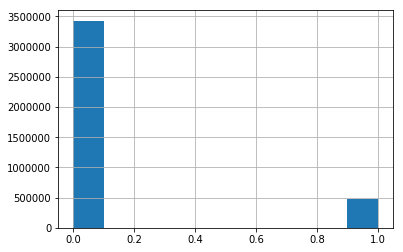

In [4]:
births_df.risky0.hist()

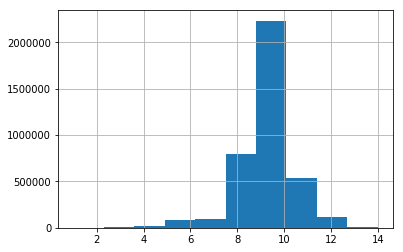

In [4]:
births_df.mager14.hist()

In [25]:
age_risky = births_df[births_df.risky0 == 1].groupby(['mager14', 'risky0']).risky0.count()

In [ ]:
age_notrisky = births_df[births_df.risky0 == 0].groupby(['mager14', 'risky0']).risky0.count()

In [ ]:
births_df.mager14.count()

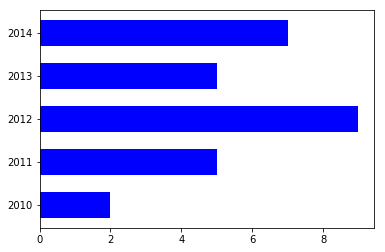

In [7]:
years = np.arange(2010, 2015)
values = [2, 5, 9, 5, 7]

num_years = len(years)

plt.barh(range(num_years),
         values,
         color='blue',
         height=0.6,
         align='center')

plt.yticks(range(num_years),
           [yr for yr in years]);